In [802]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

In [803]:
data_0 = pd.read_csv(r'D:\PycharmProjects\260276\zpi\data\maestro-calculated.csv', low_memory=False)
data_0

,event-processing-time,processing-location-is-eur,job_name,regulatory-approaches,event_time,uid,event-total-time,business-date,as-of-datetime,batch-instance-seq,...,bsinp-run-id,api-version,as-of-date,event-waiting-time,hac-run-id,source-type-is-pb,processing-location-is-ch,process-flag,business-day,skip-mdl-landing
0,1,NaN,open-date-card,NaN,2022-07-30 05:08:25.0,1bf0c3f00fa411ed9efe75307937e094,1,2022-07-29,2022-07-30_03.08.13,NaN,...,NaN,NaN,2022-07-29,0,NaN,NaN,NaN,NaN,BD0,NaN
1,1,NaN,init-strategic-batch,NaN,2022-07-30 05:08:28.0,1d276f310fa411ed9efe8981c11f5895,2,2022-07-29,2022-07-30_03.08.13,NaN,...,NaN,NaN,2022-07-29,1,1.0,NaN,NaN,NaN,BD0,NaN
2,0,NaN,start-strategic-batch,NaN,2022-07-30 05:08:30.0,1efd67b20fa411ed9efe9dbf45703841,1,2022-07-29,2022-07-29_00.00.00,1.0,...,129.0,11.0,2022-07-29,1,1.0,NaN,NaN,NaN,BD0,NaN
3,39,NaN,land-f1ref-data,NaN,2022-07-30 05:09:12.0,20d312130fa411ed9efe07e63de37124,40,2022-07-29,2022-07-29_00.00.00,1.0,...,129.0,11.0,2022-07-29,1,1.0,NaN,NaN,NaN,BD0,NaN
4,52,NaN,reload-f1ref-landing-tables,NaN,2022-07-30 05:10:05.0,39169e550fa411ed9efe498d27132ecc,52,2022-07-29,2022-07-29_00.00.00,1.0,...,129.0,11.0,2022-07-29,0,1.0,NaN,NaN,NaN,BD0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17242,422,NaN,reload-securitization-tables-b3std,ONLY-B3,2022-11-26 20:12:07.0,daf392f76db411edb0c2698aad966f3e,422,2022-11-25,2022-11-25_00.00.00,1.0,...,161.0,NaN,2022-11-25,0,1.0,NaN,NaN,NaN,BD0,NaN
17243,1,NaN,complete-securitization-batch,NON-B3,2022-11-26 20:07:56.0,405566ad6db511edb0c23760940d0635,1,2022-11-25,2022-11-25_00.00.00,1.0,...,161.0,NaN,2022-11-25,0,1.0,NaN,NaN,NaN,BD0,NaN
17244,108,NaN,reload-tactical-tables-post-securitization,NON-B3,2022-11-26 20:09:47.0,418e34ce6db511edb0c2bdc4d02102d6,110,2022-11-25,2022-11-25_00.00.00,1.0,...,161.0,NaN,2022-11-25,2,1.0,NaN,NaN,NaN,BD0,NaN
17245,931,1.0,reload-b3ler-audit,NaN,2022-11-26 20:23:56.0,5218fa5f6db511edb0c2ebbc1bc265b0,931,2022-11-25,2022-11-25_00.00.00,1.0,...,161.0,NaN,2022-11-25,0,1.0,NaN,NaN,NaN,BD0,NaN


In [804]:
data_core = data_0[["event-processing-time","event-total-time","event-waiting-time","business-day","skip-mdl-landing","skip-mdl-out","batch-workflow",'parent_uid',"uid","job_name"]].copy()
data_core

,event-processing-time,event-total-time,event-waiting-time,business-day,skip-mdl-landing,skip-mdl-out,batch-workflow,parent_uid,uid,job_name
0,1,1,0,BD0,NaN,NaN,STRATEGIC_PAC,1be997ff0fa411ed9efe4be67384bf3f,1bf0c3f00fa411ed9efe75307937e094,open-date-card
1,1,2,1,BD0,NaN,NaN,STRATEGIC_PAC,1bf0c3f00fa411ed9efe75307937e094,1d276f310fa411ed9efe8981c11f5895,init-strategic-batch
2,0,1,1,BD0,NaN,NaN,STRATEGIC_PAC,1d276f310fa411ed9efe8981c11f5895,1efd67b20fa411ed9efe9dbf45703841,start-strategic-batch
3,39,40,1,BD0,NaN,NaN,STRATEGIC_PAC,1efd67b20fa411ed9efe9dbf45703841,20d312130fa411ed9efe07e63de37124,land-f1ref-data
4,52,52,0,BD0,NaN,NaN,STRATEGIC_PAC,20d312130fa411ed9efe07e63de37124,39169e550fa411ed9efe498d27132ecc,reload-f1ref-landing-tables
...,...,...,...,...,...,...,...,...,...,...
17242,422,422,0,BD0,NaN,NaN,STRATEGIC_SEC,35cf448b6db411edb0c23dd0b18b3ef8,daf392f76db411edb0c2698aad966f3e,reload-securitization-tables-b3std
17243,1,1,0,BD0,NaN,NaN,STRATEGIC_SEC,daf392f66db411edb0c205a365742049,405566ad6db511edb0c23760940d0635,complete-securitization-batch
17244,108,110,2,BD0,NaN,NaN,STRATEGIC_SEC,405566ad6db511edb0c23760940d0635,418e34ce6db511edb0c2bdc4d02102d6,reload-tactical-tables-post-securitization
17245,931,931,0,BD0,NaN,NaN,STRATEGIC_AMS,2ea593de6db311edb0c27ddd3c3b70b6,5218fa5f6db511edb0c2ebbc1bc265b0,reload-b3ler-audit


In [805]:
#data_core["business-day"] = data_core["business-day"].str.slice(2,3).replace(np.nan, -1)
one_hot = pd.get_dummies(data_core[['business-day','batch-workflow','skip-mdl-landing','skip-mdl-out']])
data_core = pd.concat([data_core, one_hot], axis=1)
#data_core["skip-mdl-landing"] = data_core["skip-mdl-landing"].replace([np.nan, False], [0, 1])
#data_core["skip-mdl-out"] = data_core["skip-mdl-out"].replace([np.nan, True], [0, 1])
data_core = data_core.drop(['business-day','batch-workflow','skip-mdl-landing','skip-mdl-out'],axis=1)
data_parent = data_core[["uid","event-processing-time","event-total-time","event-waiting-time"]].copy().rename(columns={"event-processing-time":"parent-event-processing-time",
                                                                                                                        "event-total-time":"parent-event-total-time",
                                                                                                                        "event-waiting-time":"parent-event-waiting-time"})


In [806]:
result = pd.merge(data_core, data_parent, left_on="parent_uid", right_on="uid", how="left")
result[["parent-event-processing-time", "parent-event-total-time", "parent-event-waiting-time"]] = result[["parent-event-processing-time", "parent-event-total-time", "parent-event-waiting-time"]].replace(np.nan, 0)

In [807]:
print(result.shape[1])
result

27


,event-processing-time,event-total-time,event-waiting-time,parent_uid,uid_x,job_name,business-day_BD0,business-day_BD1,business-day_BD2,business-day_BD3,...,batch-workflow_STRATEGIC_CH,batch-workflow_STRATEGIC_EUR,batch-workflow_STRATEGIC_PAC,batch-workflow_STRATEGIC_SEC,skip-mdl-landing_False,skip-mdl-out_True,uid_y,parent-event-processing-time,parent-event-total-time,parent-event-waiting-time
0,1,1,0,1be997ff0fa411ed9efe4be67384bf3f,1bf0c3f00fa411ed9efe75307937e094,open-date-card,1,0,0,0,...,0,0,1,0,0,0,NaN,0.0,0.0,0.0
1,1,2,1,1bf0c3f00fa411ed9efe75307937e094,1d276f310fa411ed9efe8981c11f5895,init-strategic-batch,1,0,0,0,...,0,0,1,0,0,0,1bf0c3f00fa411ed9efe75307937e094,1.0,1.0,0.0
2,0,1,1,1d276f310fa411ed9efe8981c11f5895,1efd67b20fa411ed9efe9dbf45703841,start-strategic-batch,1,0,0,0,...,0,0,1,0,0,0,1d276f310fa411ed9efe8981c11f5895,1.0,2.0,1.0
3,39,40,1,1efd67b20fa411ed9efe9dbf45703841,20d312130fa411ed9efe07e63de37124,land-f1ref-data,1,0,0,0,...,0,0,1,0,0,0,1efd67b20fa411ed9efe9dbf45703841,0.0,1.0,1.0
4,52,52,0,20d312130fa411ed9efe07e63de37124,39169e550fa411ed9efe498d27132ecc,reload-f1ref-landing-tables,1,0,0,0,...,0,0,1,0,0,0,20d312130fa411ed9efe07e63de37124,39.0,40.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17246,422,422,0,35cf448b6db411edb0c23dd0b18b3ef8,daf392f76db411edb0c2698aad966f3e,reload-securitization-tables-b3std,1,0,0,0,...,0,0,0,1,0,0,35cf448b6db411edb0c23dd0b18b3ef8,277.0,277.0,0.0
17247,1,1,0,daf392f66db411edb0c205a365742049,405566ad6db511edb0c23760940d0635,complete-securitization-batch,1,0,0,0,...,0,0,0,1,0,0,daf392f66db411edb0c205a365742049,170.0,170.0,0.0
17248,108,110,2,405566ad6db511edb0c23760940d0635,418e34ce6db511edb0c2bdc4d02102d6,reload-tactical-tables-post-securitization,1,0,0,0,...,0,0,0,1,0,0,405566ad6db511edb0c23760940d0635,1.0,1.0,0.0
17249,931,931,0,2ea593de6db311edb0c27ddd3c3b70b6,5218fa5f6db511edb0c2ebbc1bc265b0,reload-b3ler-audit,1,0,0,0,...,0,0,0,0,0,0,2ea593de6db311edb0c27ddd3c3b70b6,918.0,918.0,0.0


In [808]:
print(result.columns)
print(result.dtypes)

Index(['event-processing-time', 'event-total-time', 'event-waiting-time',
       'parent_uid', 'uid_x', 'job_name', 'business-day_BD0',
       'business-day_BD1', 'business-day_BD2', 'business-day_BD3',
       'business-day_BD4', 'business-day_BD5', 'business-day_BD6',
       'business-day_BD7', 'business-day_BD8', 'business-day_BD9',
       'batch-workflow_STRATEGIC_AMS', 'batch-workflow_STRATEGIC_CH',
       'batch-workflow_STRATEGIC_EUR', 'batch-workflow_STRATEGIC_PAC',
       'batch-workflow_STRATEGIC_SEC', 'skip-mdl-landing_False',
       'skip-mdl-out_True', 'uid_y', 'parent-event-processing-time',
       'parent-event-total-time', 'parent-event-waiting-time'],
      dtype='object')
event-processing-time             int64
event-total-time                  int64
event-waiting-time                int64
parent_uid                       object
uid_x                            object
job_name                         object
business-day_BD0                  uint8
business-day_BD1      

In [809]:
class NeuralNetwork(nn.Module):
    def __init__(self,a):
       super(NeuralNetwork, self).__init__()
       self.linear_relu_stack = nn.Sequential(
           nn.Linear(a, 30),
           nn.ReLU(),
           nn.Linear(30, 60),
           nn.ReLU(),
           nn.Linear(60, 1),
       )
    def forward(self, x):
       x = self.linear_relu_stack(x)
       return x

In [810]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
clf = NeuralNetwork(a=22).to(device)
opt = torch.optim.SGD(clf.parameters(), lr=0.0001)
loss_fn = nn.MSELoss(reduction='sum')
print(device)

cpu


In [811]:
unique_values = result["job_name"].unique()
data_stats = {}
for values in unique_values:
    data_stats[values] = []
    with open(f'D:\\PycharmProjects\\260276\\zpi\\model\\{values}', 'wb') as f:
        torch.save(clf.state_dict(), f)
print(len(unique_values))

60


In [812]:
for i in range(15):
    print(i)
    for index, row in result.iterrows():
        with open(f'D:\\PycharmProjects\\260276\\zpi\\model\\{row["job_name"]}', 'rb') as f:
            clf.load_state_dict(torch.load(f))
        X = torch.tensor(np.array(row[['event-processing-time',
                                       'event-waiting-time',
                                       'business-day_BD0',
                                       'business-day_BD1',
                                       'business-day_BD2',
                                       'business-day_BD3',
                                       'business-day_BD4',
                                       'business-day_BD5',
                                       'business-day_BD6',
                                       'business-day_BD7',
                                       'business-day_BD8',
                                       'business-day_BD9',
                                       'batch-workflow_STRATEGIC_AMS',
                                       'batch-workflow_STRATEGIC_CH',
                                       'batch-workflow_STRATEGIC_EUR',
                                       'batch-workflow_STRATEGIC_PAC',
                                       'batch-workflow_STRATEGIC_SEC',
                                       'skip-mdl-landing_False',
                                       'skip-mdl-out_True',
                                       'parent-event-processing-time',
                                       'parent-event-total-time',
                                       'parent-event-waiting-time']].astype(int))).float()
        Y =torch.tensor([float(row['event-total-time'])])
        ywhat = clf(X)
        loss = loss_fn(ywhat, Y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        data_stats[row["job_name"]].append(loss.item())
        with open(f'D:\\PycharmProjects\\260276\\zpi\\model\\{row["job_name"]}', 'wb') as f:
            torch.save(clf.state_dict(), f)

        #print(index, row['job_name'],row['business-day_BD0'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [813]:
from matplotlib import pyplot as plt

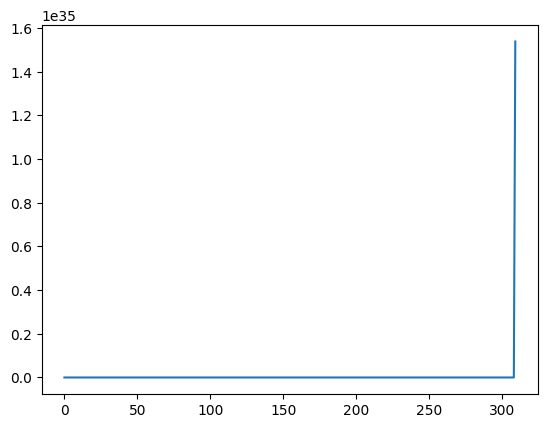

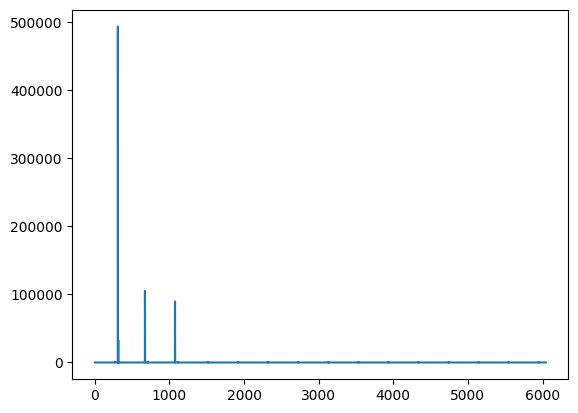

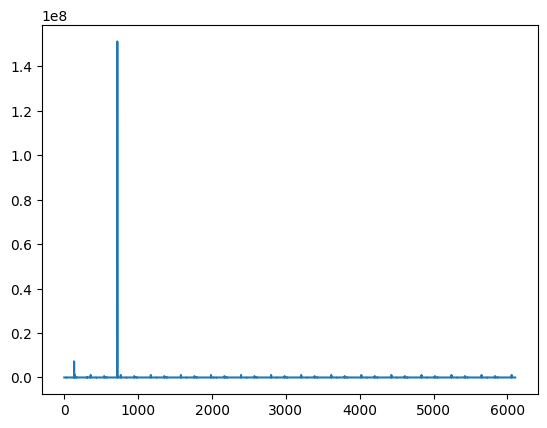

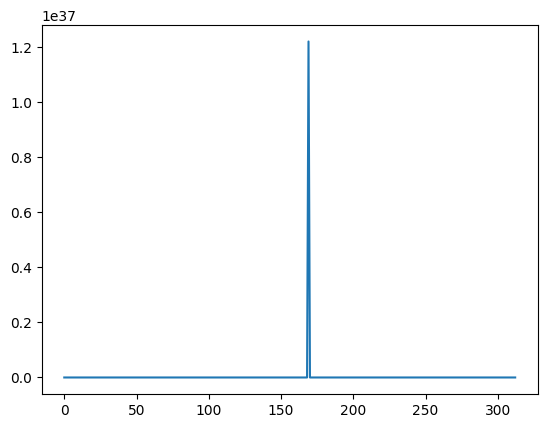

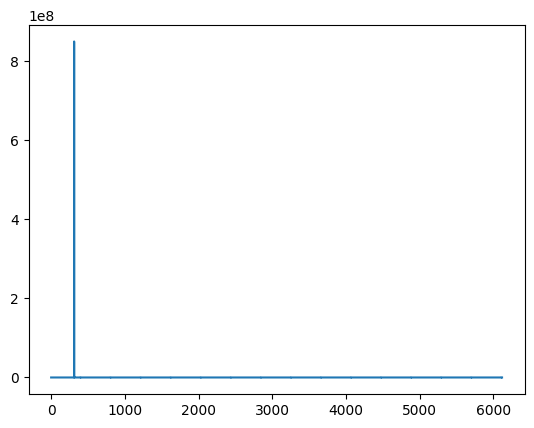

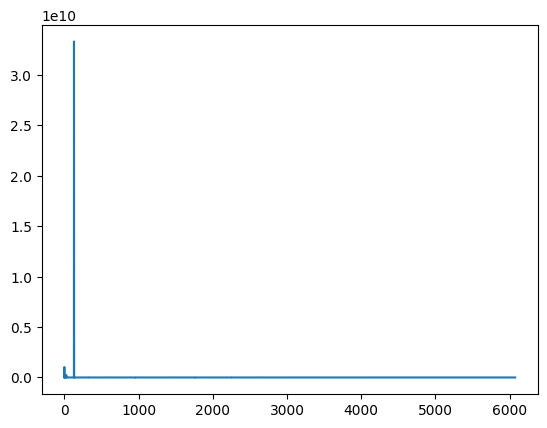

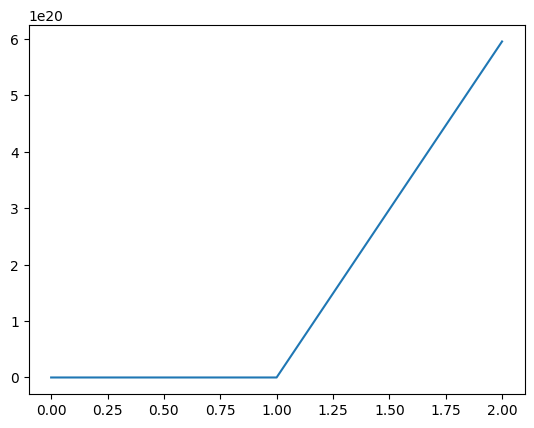

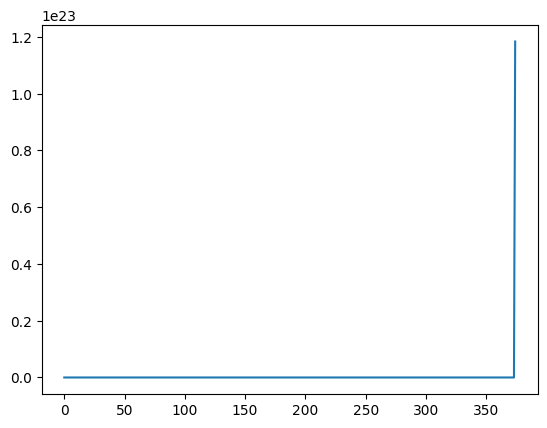

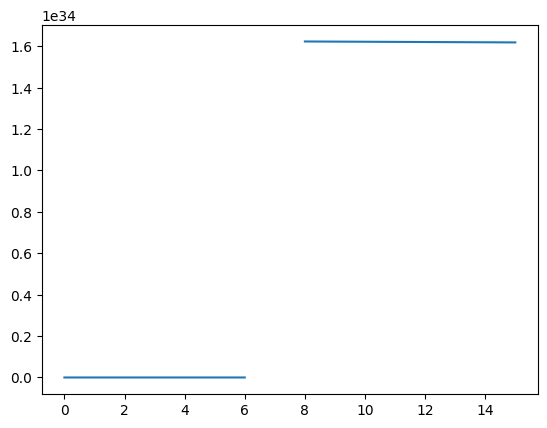

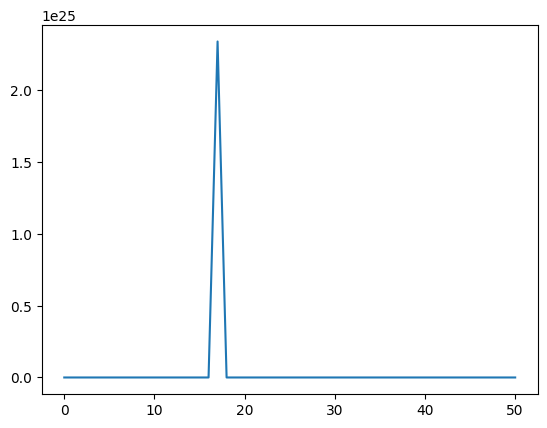

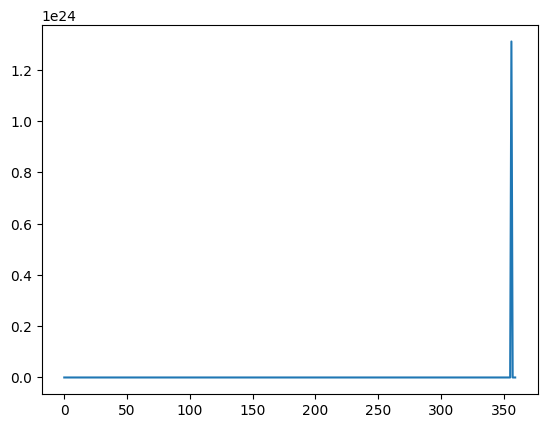

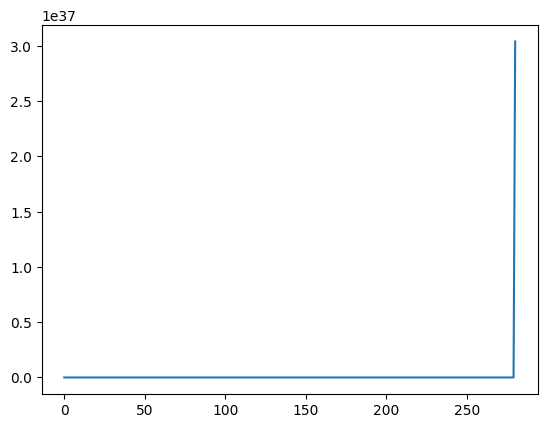

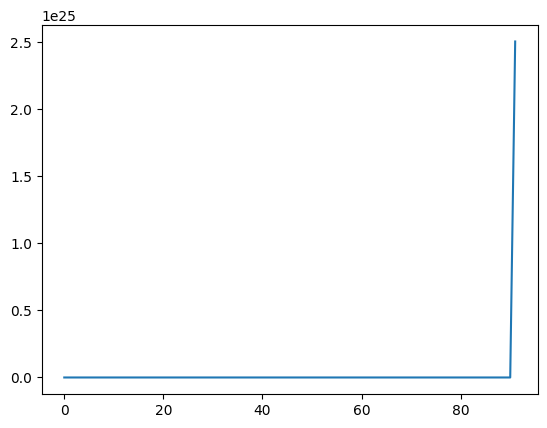

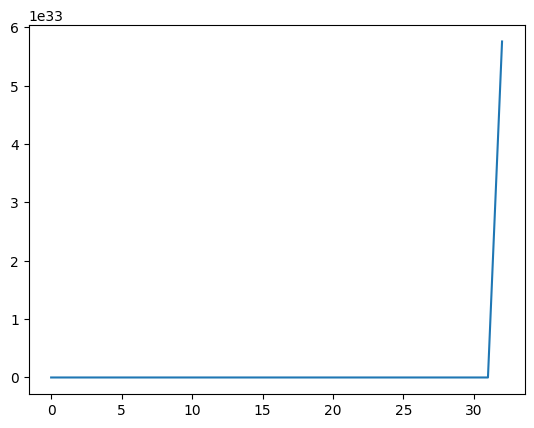

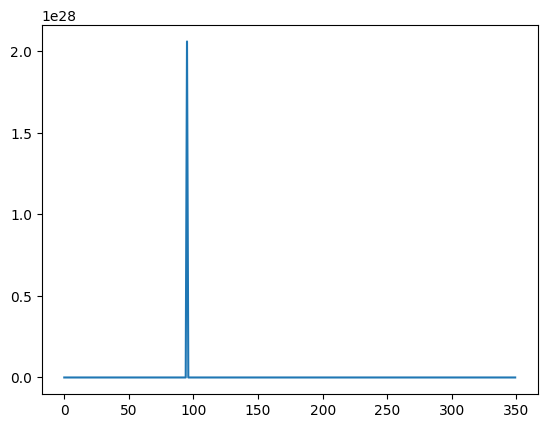

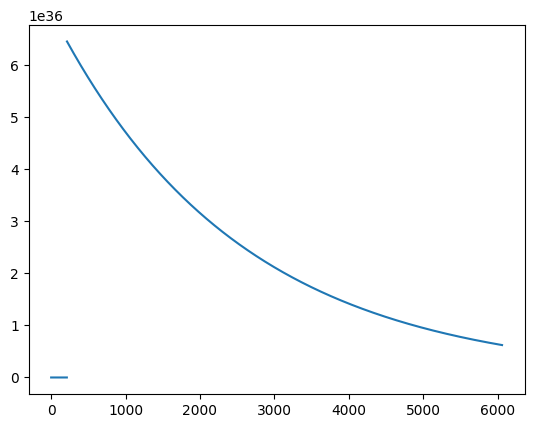

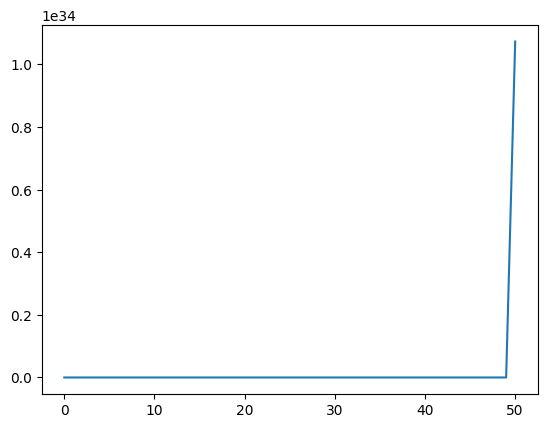

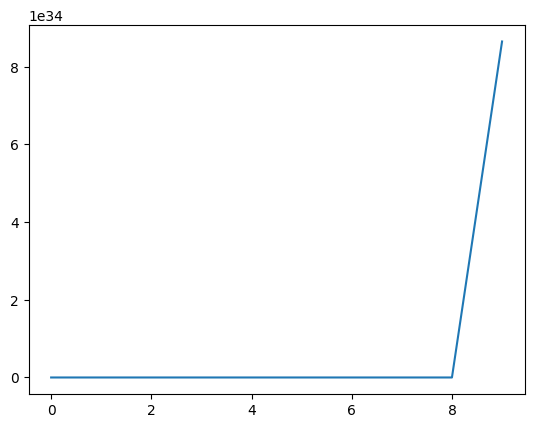

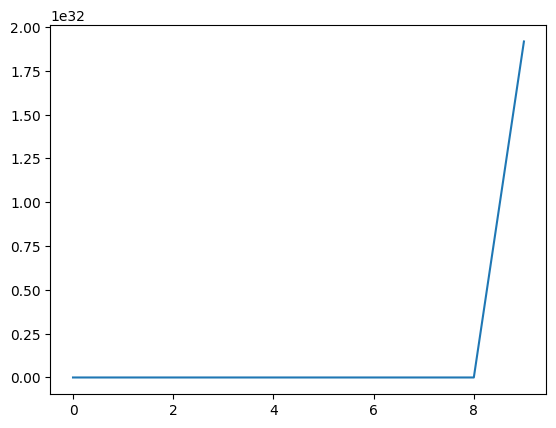

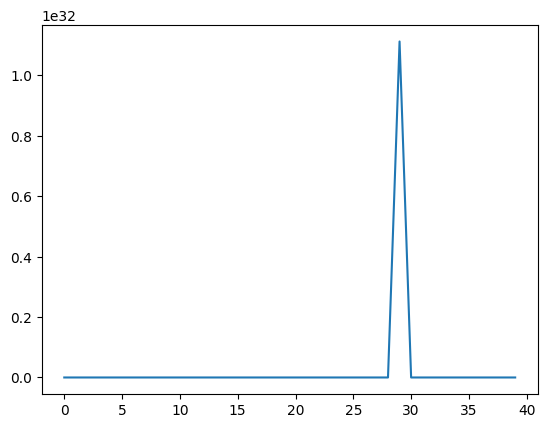

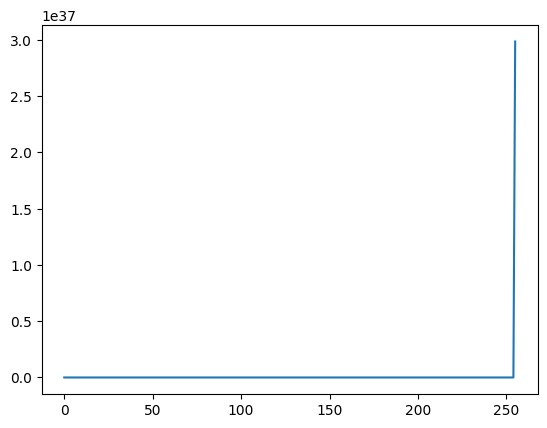

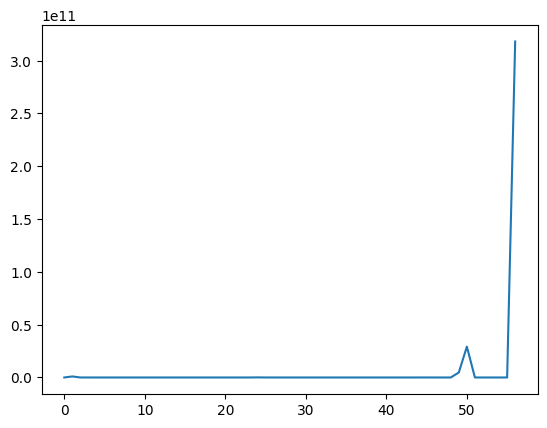

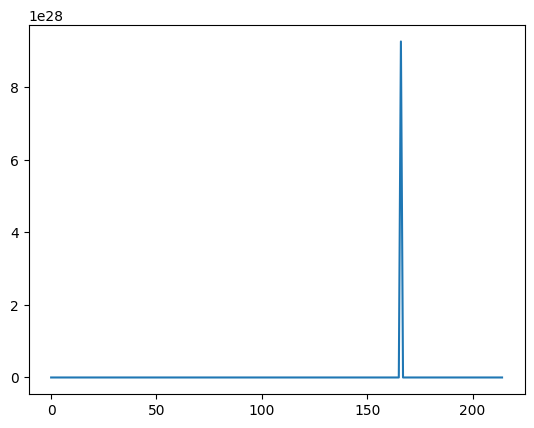

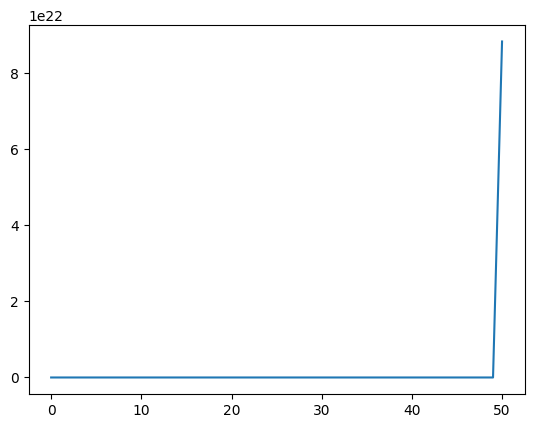

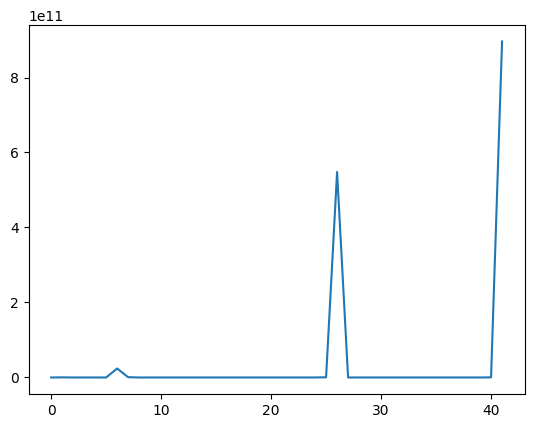

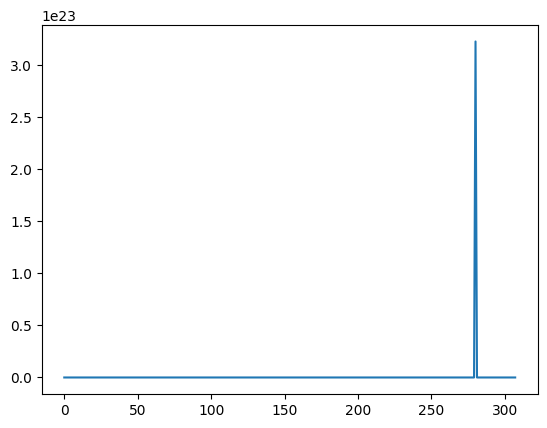

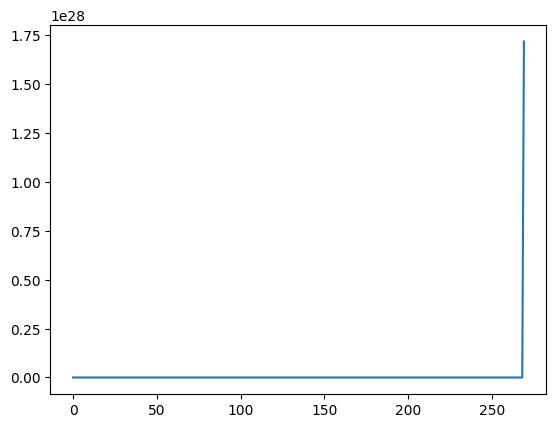

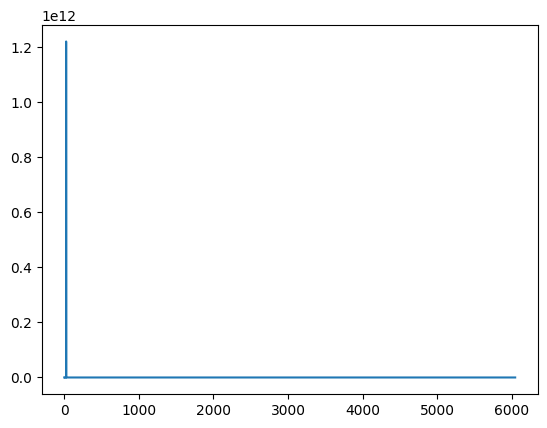

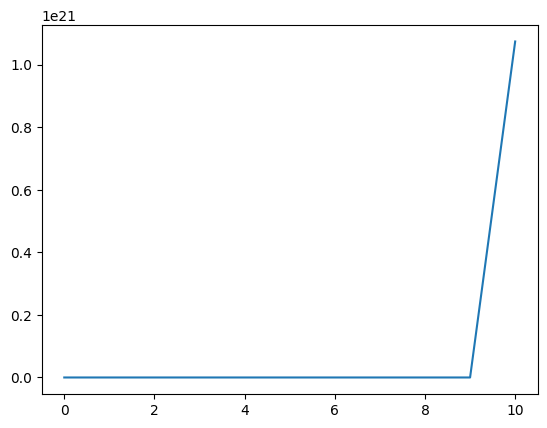

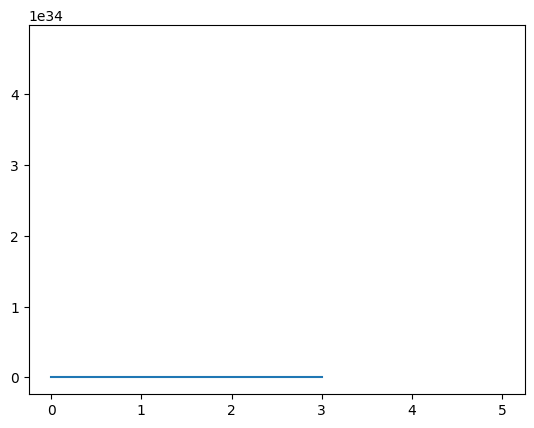

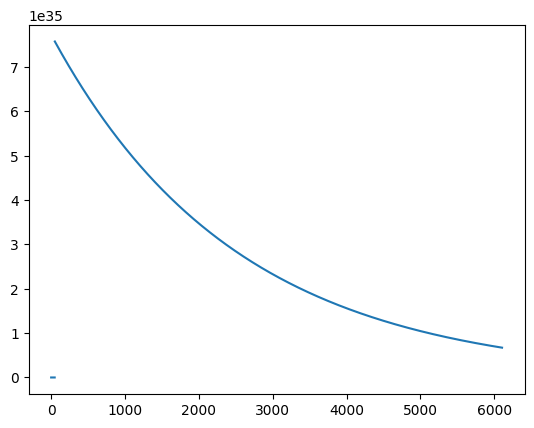

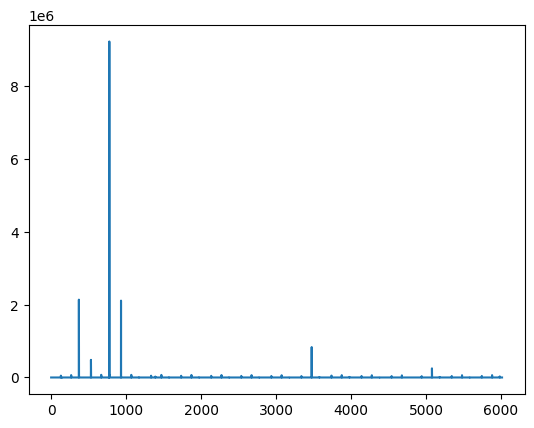

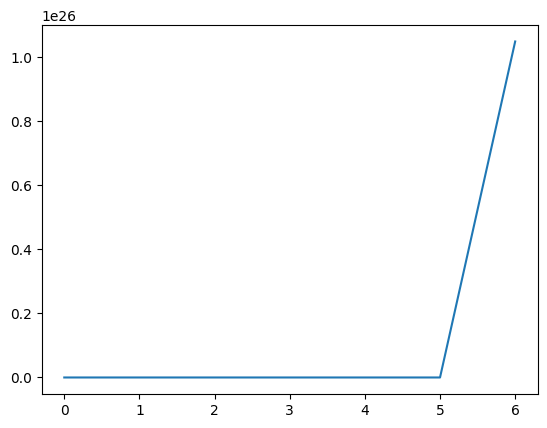

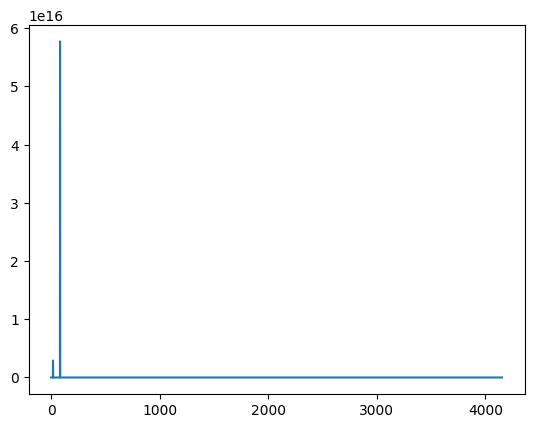

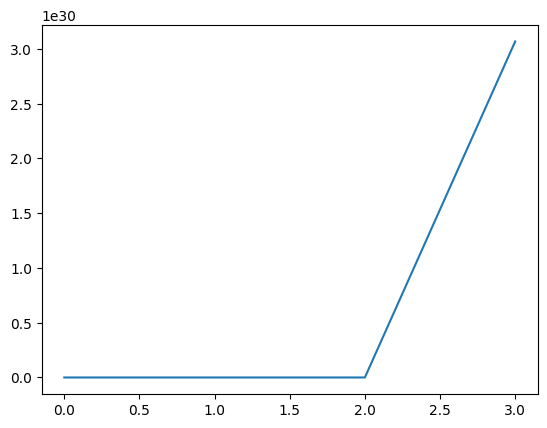

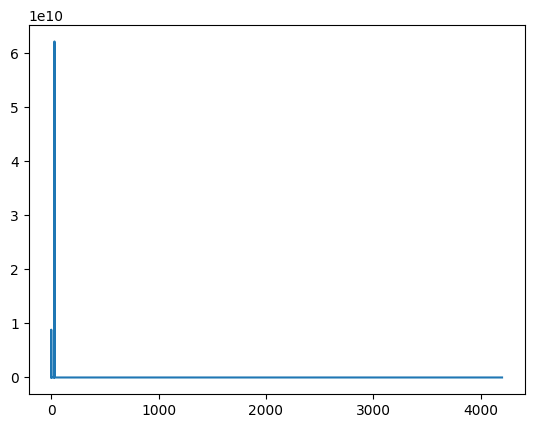

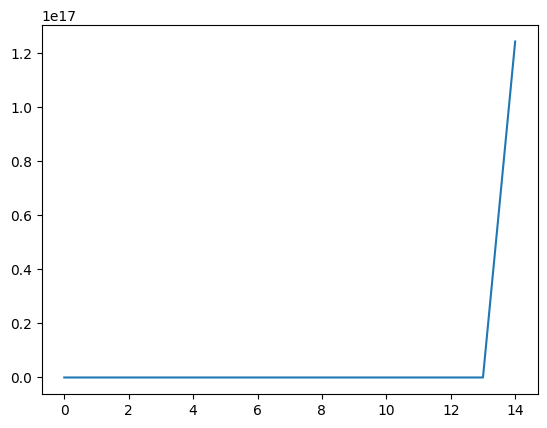

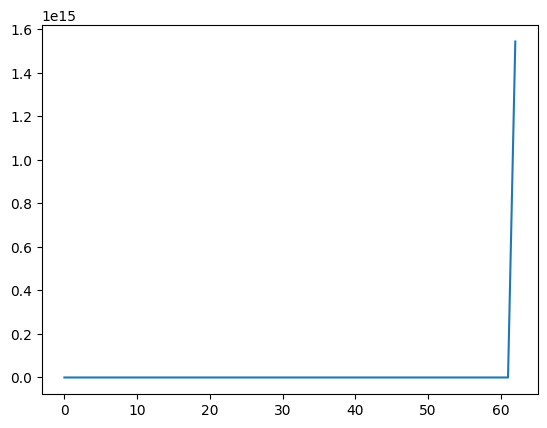

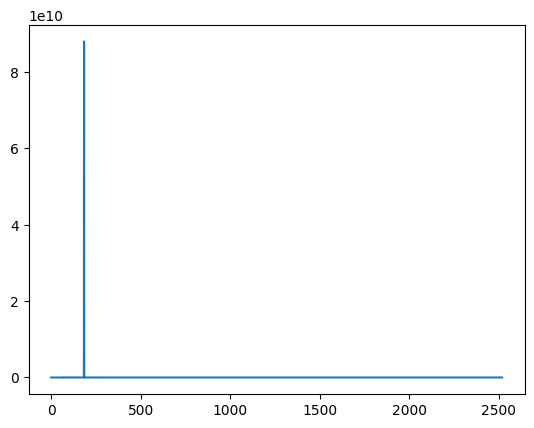

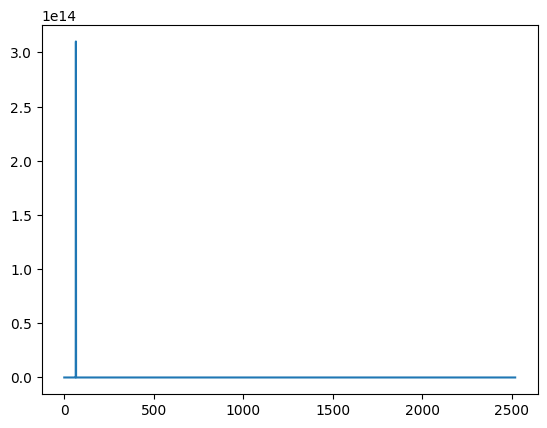

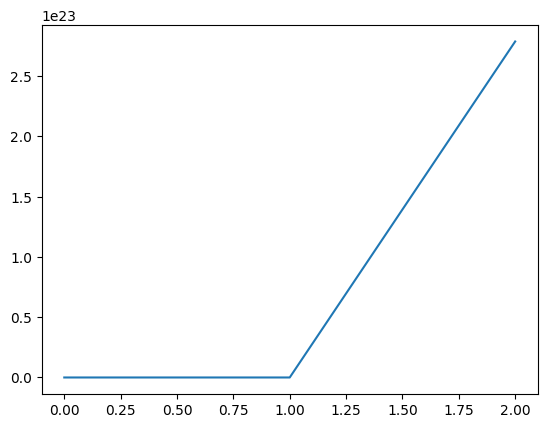

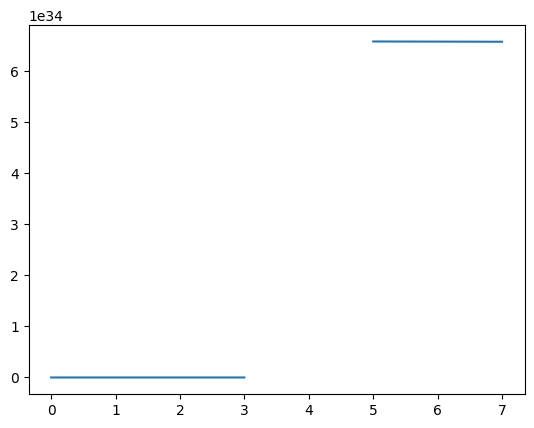

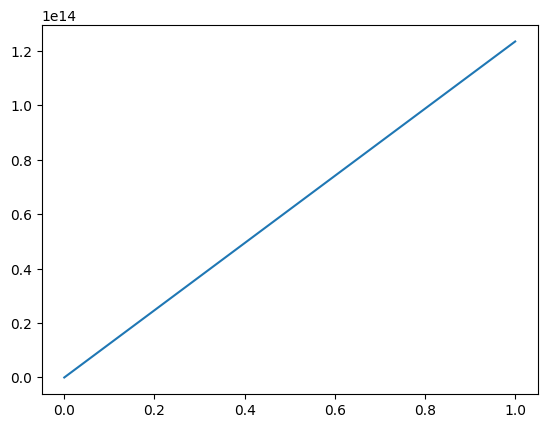

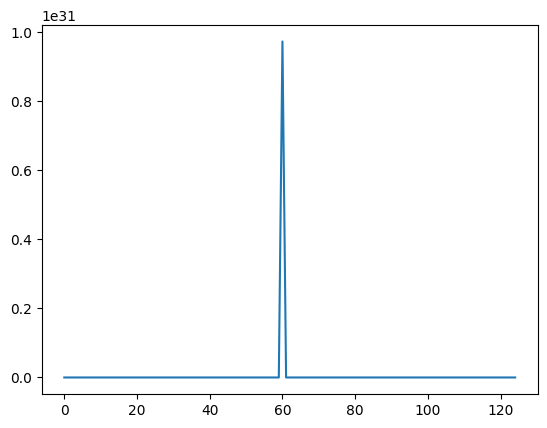

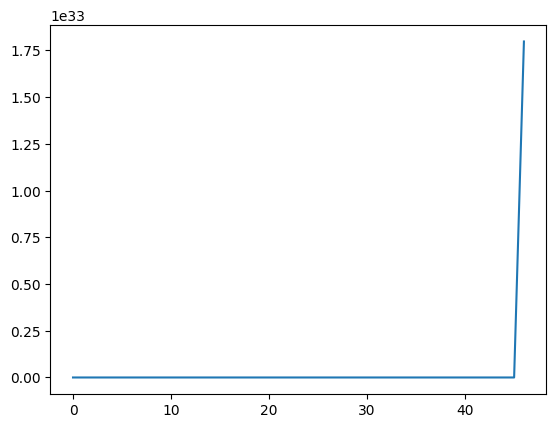

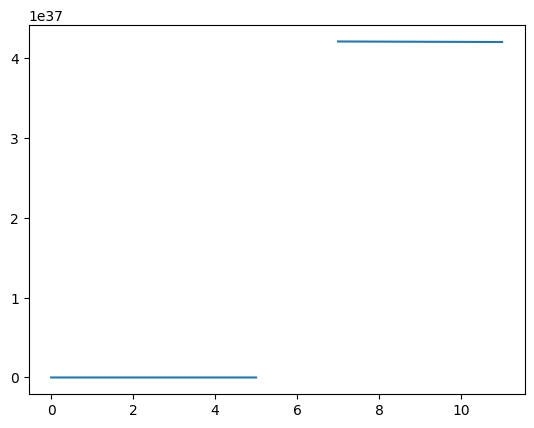

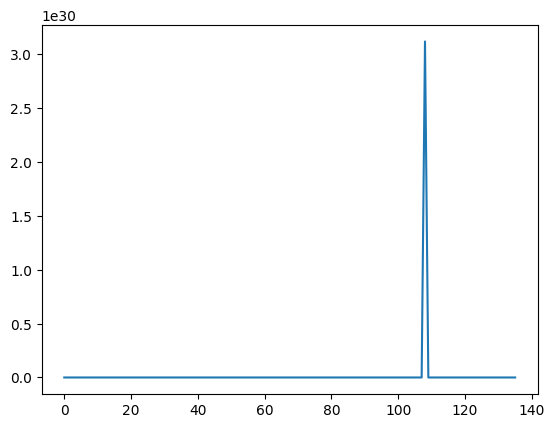

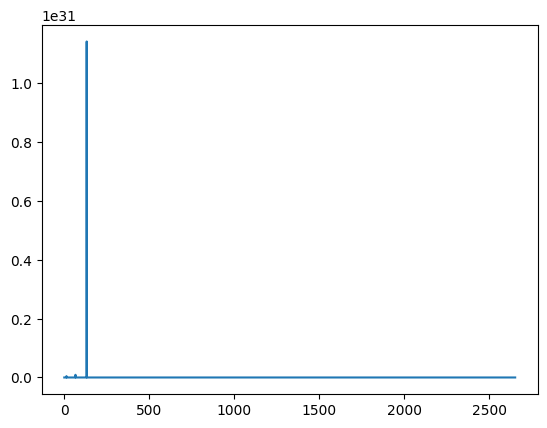

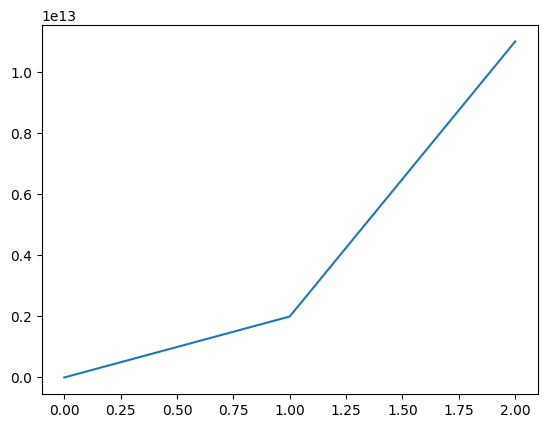

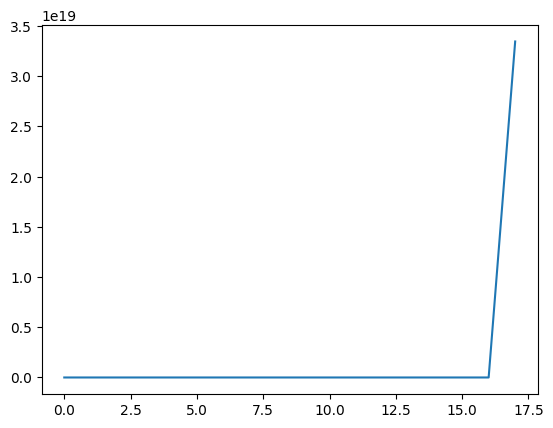

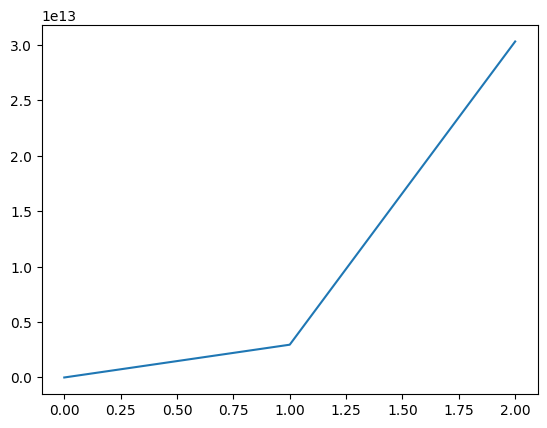

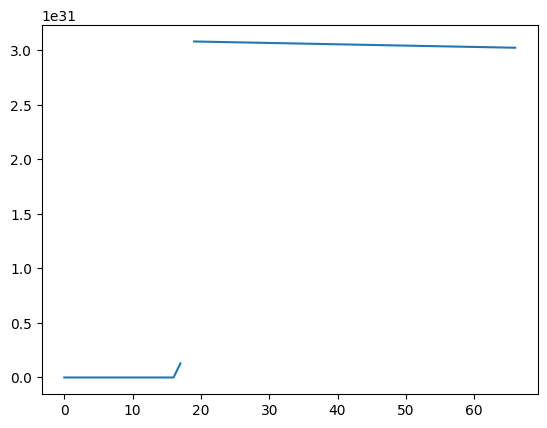

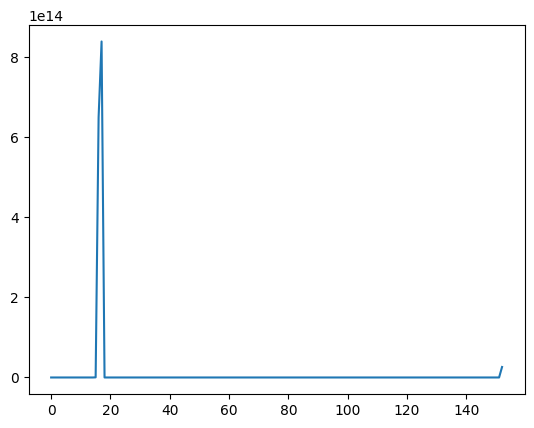

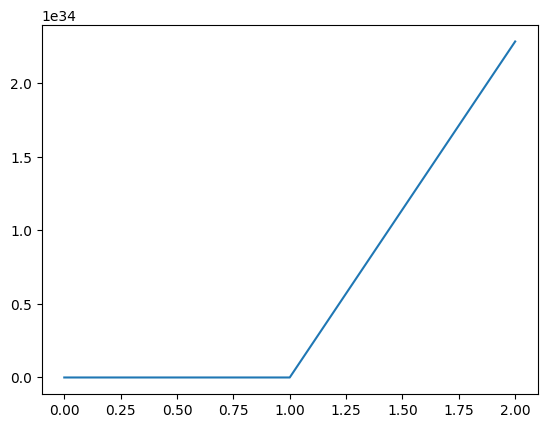

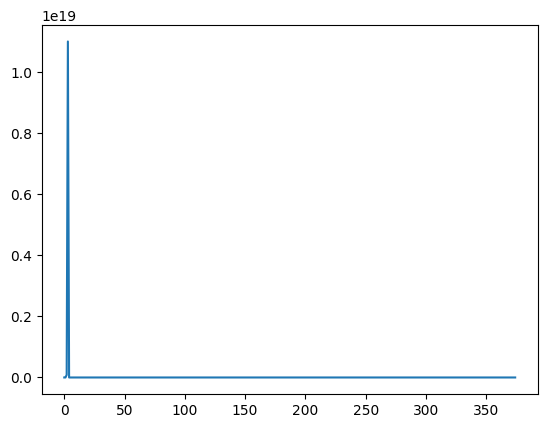

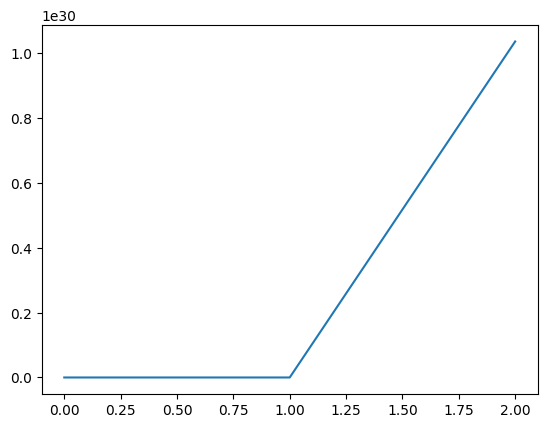

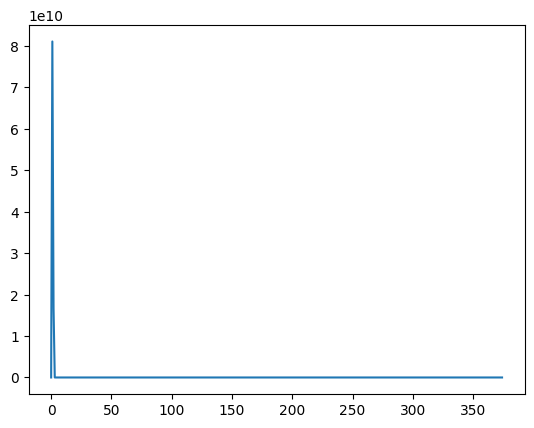

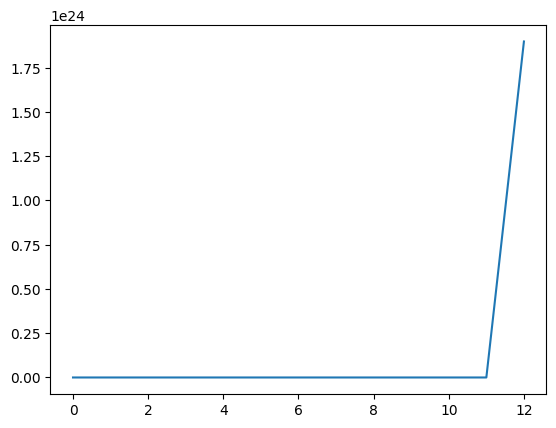

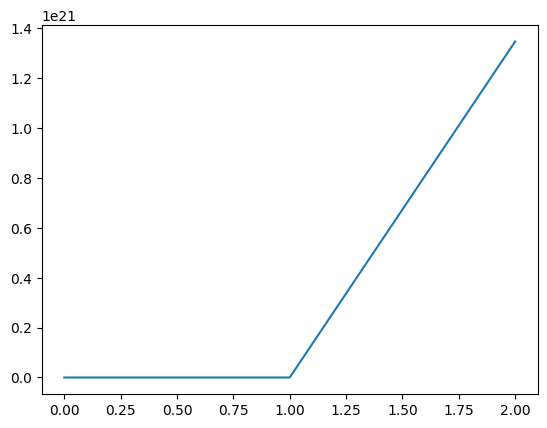

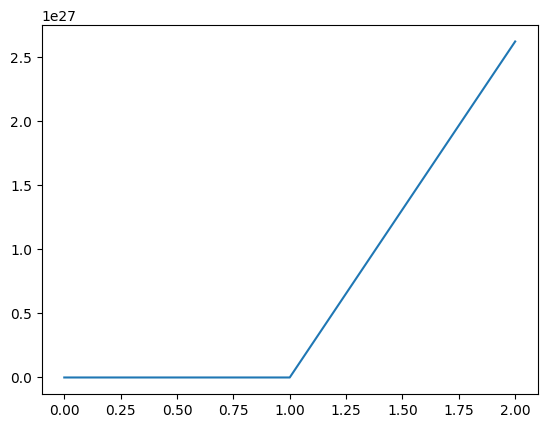

In [814]:
for key in data_stats.keys():
    plt.plot(data_stats[key])
    plt.show()